In [28]:
from moseq2_detectron_extract.io.annot import read_annotations, default_keypoint_names, replace_data_path_in_annotations
import matplotlib.pyplot as plt
from moseq2_detectron_extract.io.image import read_image
import random
import seaborn as sns

In [19]:
annot_files = [
    #"C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\result.json",
    #"C:\\Users\\thackray\\moseq-detectron-data\\2021-09-15_sci-dataset-big-annotated-keypoints-masks\\project-3-at-2022-02-19-19-24-fe2ed492.json",
    "C:\\Users\\thackray\\moseq-detectron-data\\2022-02-19_sci-dataset-outlier-annotated-keypoints-masks\\project-64-at-2022-02-19-19-06-e5e40b7e.json",
]
replace_data_path = [
    ("/data/local-files/?d=Moseq-SCI-Detectron/images/", "C:\\Users\\thackray\\moseq-detectron-data\\2021-09-15_sci-dataset-big-annotated-keypoints-masks\\sci-dataset\\images\\"),
    ("images/", "C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\images\\"),
    ("E:\\moseq_raw_data\\unet_testing\\multi-dataset\\from_cluster\\images\\", "C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\images\\"),
    ("/data/upload/", "C:\\Users\\thackray\\moseq-detectron-data\\2022-02-19_sci-dataset-outlier-annotated-keypoints-masks\\images\\"),
]

In [20]:
intensity_scale = (100/255)
annotations = []
for anot_f in annot_files:
    annot = read_annotations(anot_f, default_keypoint_names, rescale=intensity_scale)
    annotations.extend(annot)

for search, replace in replace_data_path:
    replace_data_path_in_annotations(annotations, search, replace)

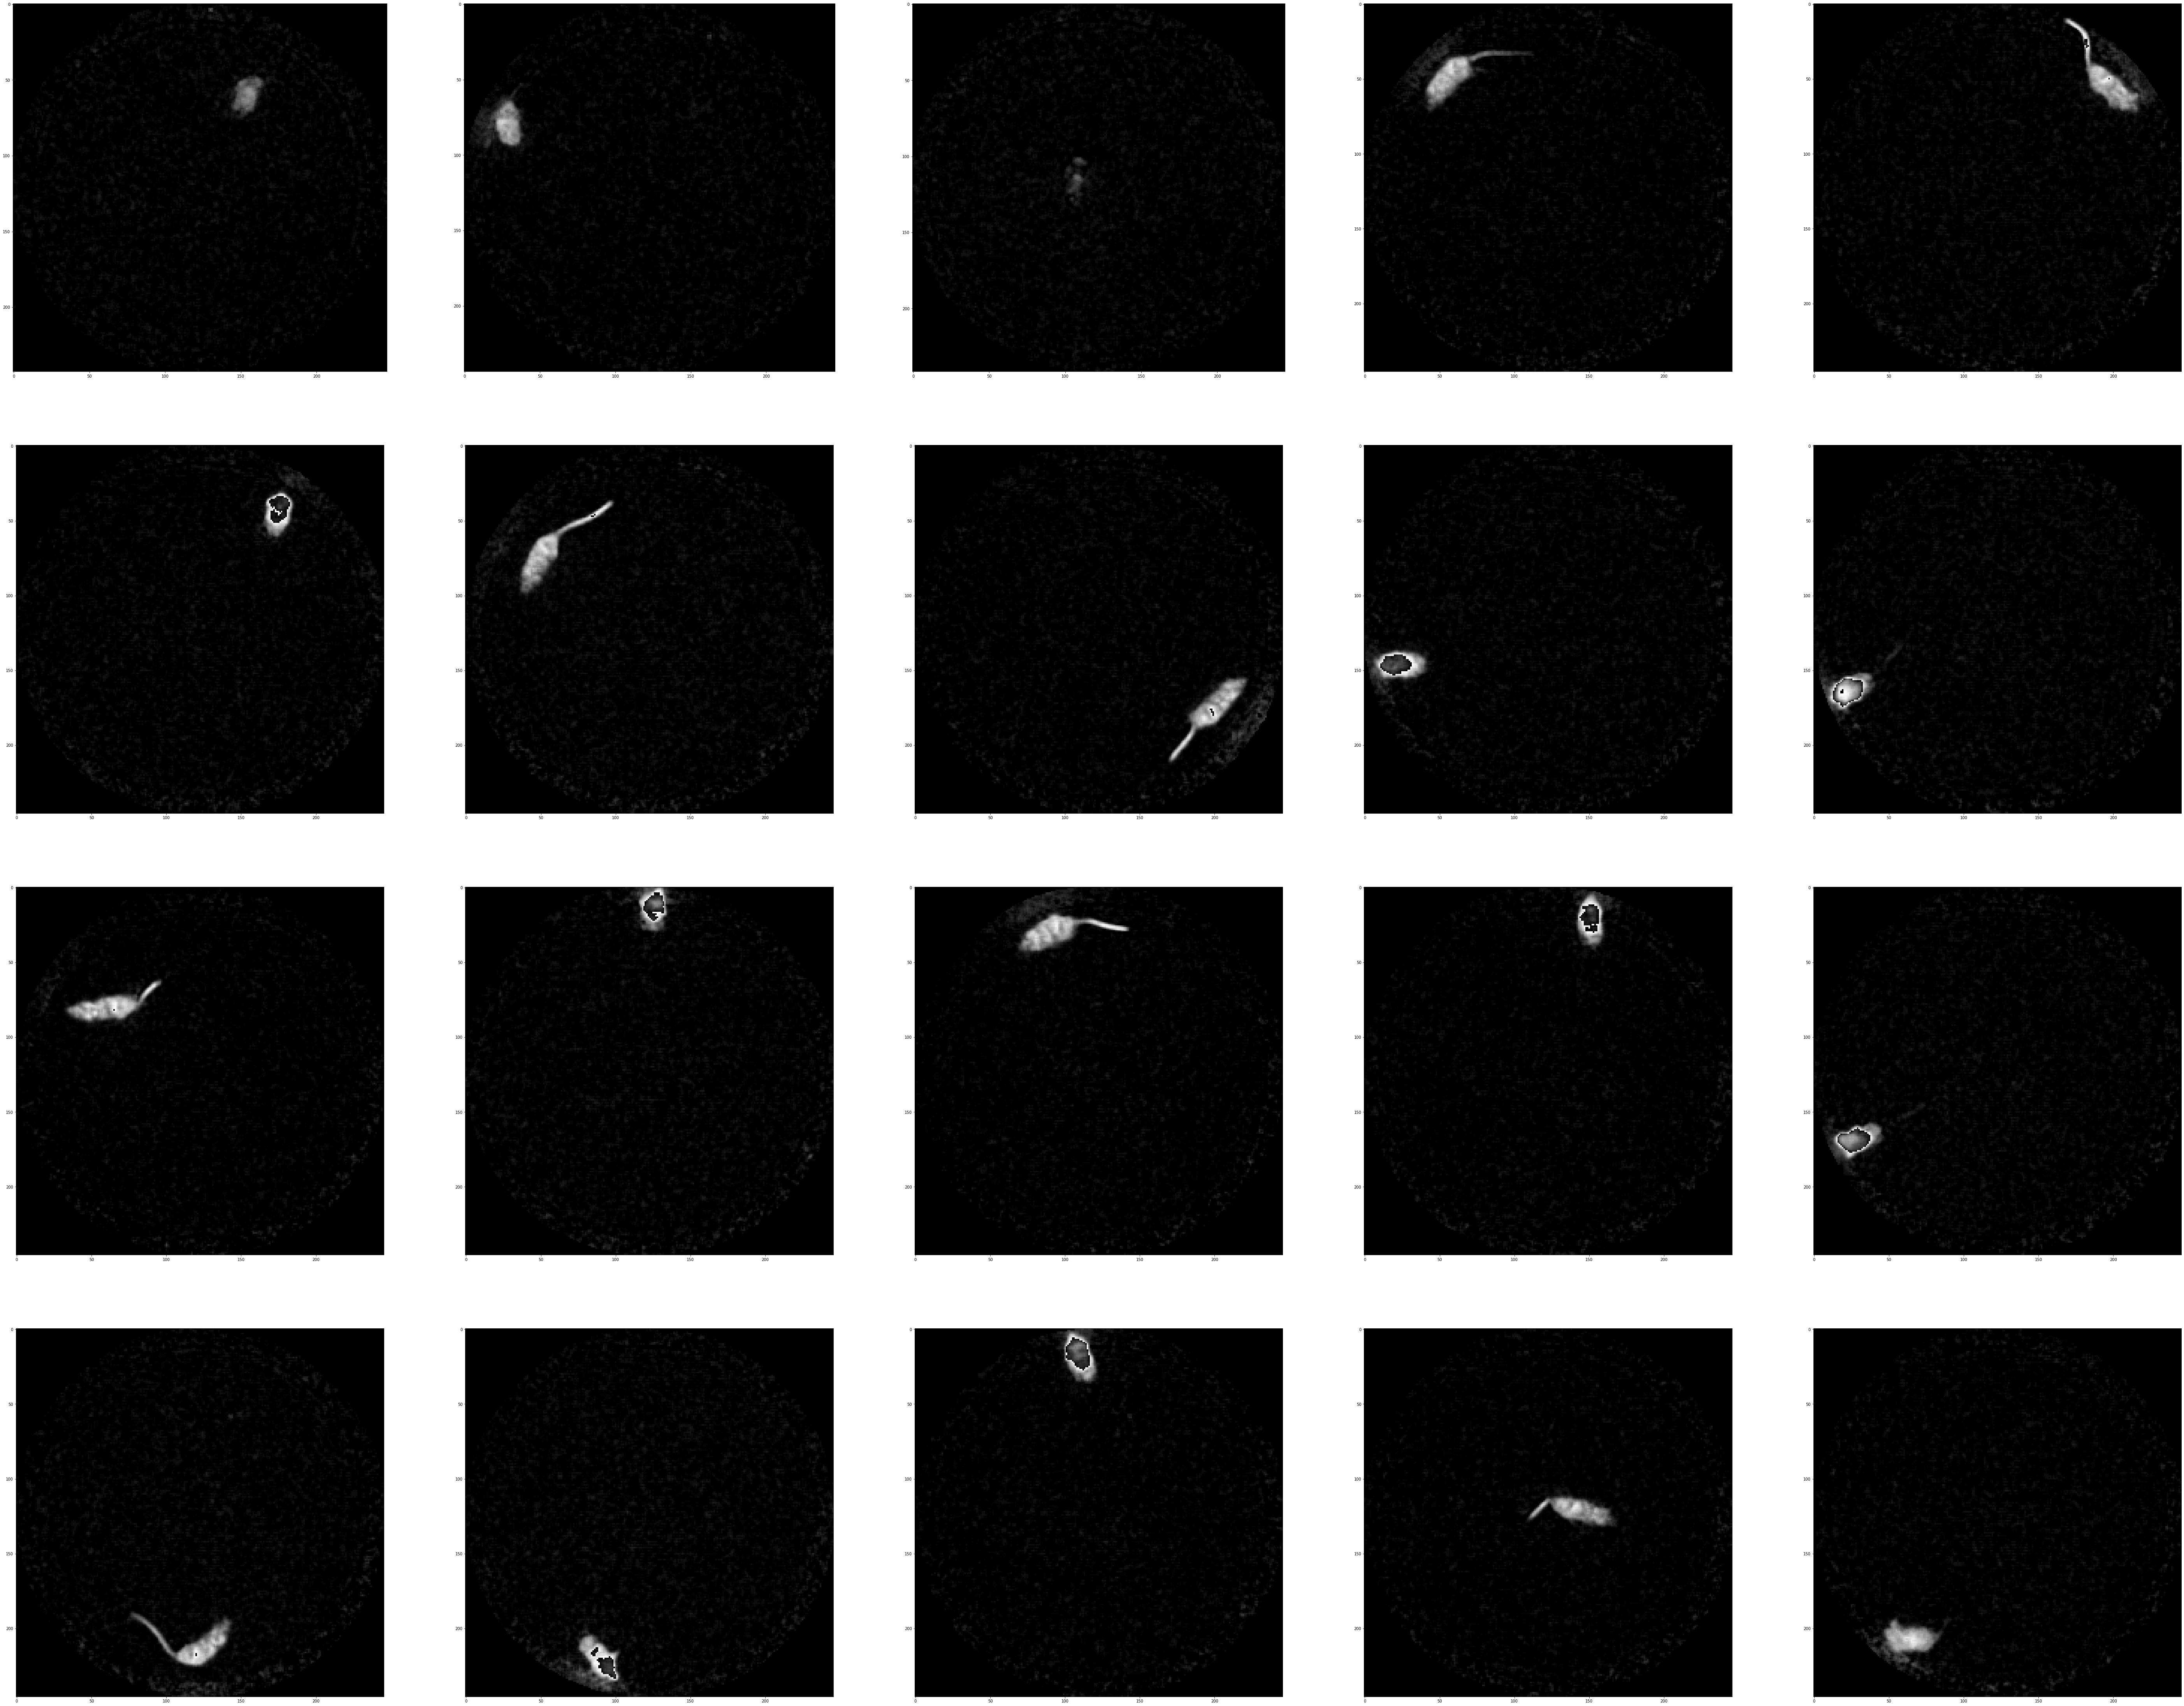

In [27]:
num = 20
num_per_row = 5
num_per_col = num//num_per_row
fig, axs = plt.subplots(num_per_col, num_per_row, figsize=(20*num_per_row,20*num_per_col))
#items = random.sample(annotations, num)
items = annotations[:20]

for d, ax in zip(items, axs.flatten()):
    im = read_image(d["file_name"], scale_factor=100/255, dtype='uint8')
    ax.imshow(im)

<AxesSubplot:ylabel='Density'>

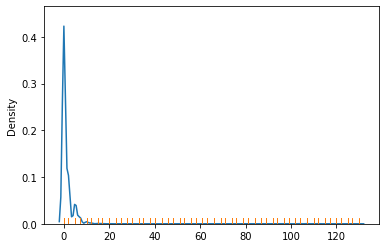

In [32]:
img = read_image(annotations[5]["file_name"], dtype='uint8').flatten()
sns.kdeplot(img)
sns.rugplot(img)